In [60]:
import pandas as pd
import spacy
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score, accuracy_score, confusion_matrix
import time
import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_csv("../data/avis/train_noYC_lemma_sent_equil.csv", index_col= 0)
df = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx')

nlp = spacy.load("fr_core_news_lg")



In [95]:
theme_frais= [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_frais'])]
theme_efficacite = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_efficacité'])]
theme_discrimination = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_discrimination'])]
theme_protexction = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_protection'])]
theme_cloture = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_clôture'])]
theme_prets = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_prêts'])]
theme_virements = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_virements'])]
theme_communication = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_communication'])]

nuggets_efficacité = pd.read_excel("../data/avis/general_df_clean_sent_15k_manual_code.xlsx",
                                   sheet_name = "curation_efficacité", index_col= 0)


# efficace 
list_exemples_efficace = nuggets_efficacité.curated_efficace
list_exemples_efficace = list_exemples_efficace.dropna()
bag_efficace = " ".join([message for message in list_exemples_efficace])
bag_efficace_nlp = nlp(bag_efficace)

# innefficace
list_exemples_innefficace = nuggets_efficacité.curated_inneficace
list_exemples_innefficace = list_exemples_innefficace.dropna()
bag_innefficace = " ".join([message for message in list_exemples_innefficace])
bag_innefficace_nlp =nlp(bag_innefficace)

nuggets_efficacité.head(1)

,raw_efficacité_efficace,curated_efficace,raw_ineficace,curated_inneficace
NaN,"Je suis satisfaite de l'accueil,du suivi merc...","Je suis satisfaite de l'accueil,du suivi merc...",délai trop long entre dossier et réception arg...,délai trop long entre dossier et réception arg...


In [63]:
def label_banks(df,ref_bag,lab_col,thresh = 0.83):
    y_pred = []
    round_count = 0
    t0 = time.time() # initialising empty variables and the timer
    for message in df.text_total: # for each review
        round_count+=1
        sim_score= []
        message = nlp(message)
        for unlabeled_sentence in message.sents: # for every sentence in the review
            for labeled_sentence in ref_bag.sents : # for every sentence in our reference bag of labeled reviews
                temp_sim_score = round(labeled_sentence.similarity(unlabeled_sentence),2) # check similarity between review sentence <> reference sentence
                sim_score.append(temp_sim_score)
        if max(sim_score) > thresh:
            y_pred.append(1)
        else:
            y_pred.append(0)
        if round_count % 100 == 0: # notification every 100 passed review
            print(round_count, " messages labelled")
    t1 = time.time() # stopping the timer
    delais = round((t1-t0)/60,2)
    df[lab_col] = y_pred # integrating result in our source dataframe
    print(f"{delais} minutes to compete similarity labelling")
    df[lab_col].value_counts()

In [64]:
# predicting not efficacious banking services
y_pred = []
label_banks(train,bag_innefficace_nlp,"var_efficacité_bad",0.83)

/var/folders/7m/gxswx1js22x0hszgmzpd29qcg1657r/T/ipykernel_45500/3635321684.py:11: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  temp_sim_score = round(labeled_sentence.similarity(unlabeled_sentence),2) # check similarity between review sentence <> reference sentence


100  messages labelled
200  messages labelled
300  messages labelled
400  messages labelled
500  messages labelled
600  messages labelled
700  messages labelled
800  messages labelled
900  messages labelled
1000  messages labelled
1100  messages labelled
1200  messages labelled
1300  messages labelled
1400  messages labelled
1500  messages labelled
1600  messages labelled
1700  messages labelled
1800  messages labelled
1900  messages labelled
2000  messages labelled
2100  messages labelled
2200  messages labelled
2300  messages labelled
2400  messages labelled
2500  messages labelled
2600  messages labelled
2700  messages labelled
2800  messages labelled
2900  messages labelled
3000  messages labelled
3100  messages labelled
3200  messages labelled
3300  messages labelled
3400  messages labelled
3500  messages labelled
3600  messages labelled
3700  messages labelled
3800  messages labelled
3900  messages labelled
4000  messages labelled
4100  messages labelled
4200  messages labelled
4

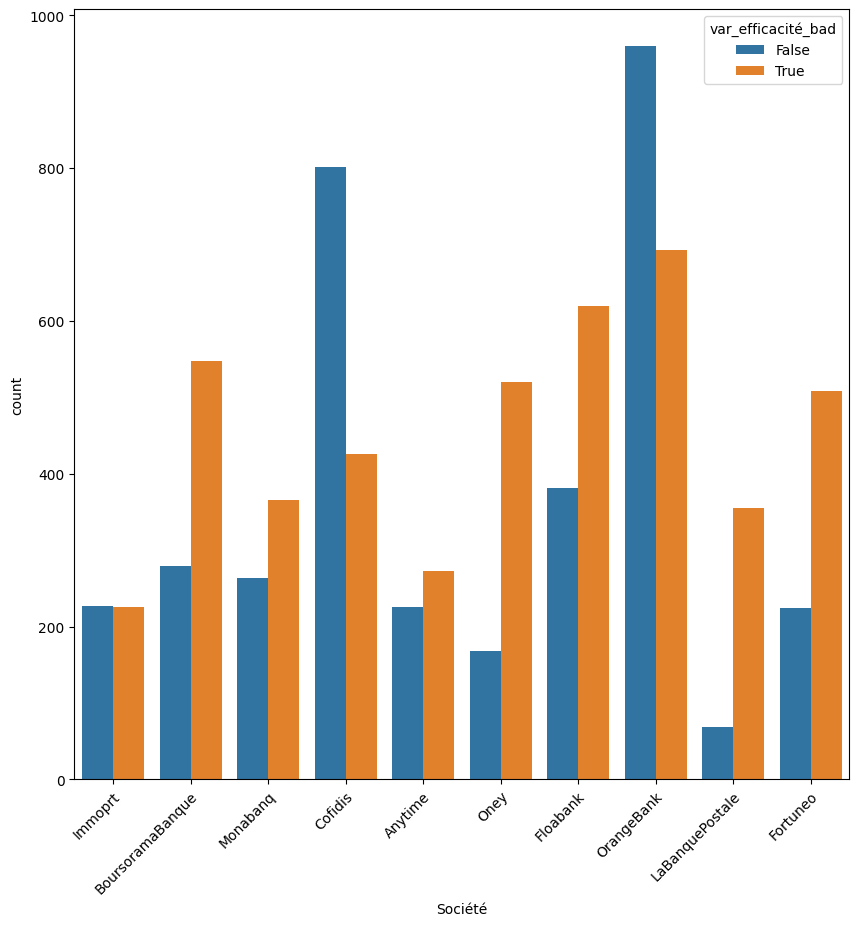

In [92]:
# top_bank topbank
list_top = [bank for bank in train.Société.value_counts().keys()[0:10]]
train_top = train[train['Société'].isin(list_top)]

import seaborn as sns
plt.figure(figsize=(10,10))
ax =sns.countplot(x = train_top.Société, hue = train_top['var_efficacité_bad']== 1)
plt.xticks(rotation=45, ha = 'right', rotation_mode = "anchor");
plt.show()

In [96]:
# predicting efficacious banking services
y_pred = []
label_banks(train,bag_efficace_nlp,"var_efficacité_good",0.83)


/var/folders/7m/gxswx1js22x0hszgmzpd29qcg1657r/T/ipykernel_45500/3635321684.py:11: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  temp_sim_score = round(labeled_sentence.similarity(unlabeled_sentence),2) # check similarity between review sentence <> reference sentence


100  messages labelled
200  messages labelled
300  messages labelled
400  messages labelled
500  messages labelled
600  messages labelled
700  messages labelled
800  messages labelled
900  messages labelled
1000  messages labelled
1100  messages labelled
1200  messages labelled
1300  messages labelled
1400  messages labelled
1500  messages labelled
1600  messages labelled
1700  messages labelled
1800  messages labelled
1900  messages labelled
2000  messages labelled
2100  messages labelled
2200  messages labelled
2300  messages labelled
2400  messages labelled
2500  messages labelled
2600  messages labelled
2700  messages labelled
2800  messages labelled
2900  messages labelled
3000  messages labelled
3100  messages labelled
3200  messages labelled
3300  messages labelled
3400  messages labelled
3500  messages labelled
3600  messages labelled
3700  messages labelled
3800  messages labelled
3900  messages labelled
4000  messages labelled
4100  messages labelled
4200  messages labelled
4

In [105]:
train.var_efficacité_good.iloc[1]

1

In [102]:
for i, message in enumerate(train[0:10,:]):
    print(train.var_efficacité_good.iloc[1])

InvalidIndexError: (slice(0, 10, None), slice(None, None, None))

In [111]:
pd.Series(conso).value_counts()

mitigé           44
not discussed    36
dtype: int64

In [113]:
train.head()

,Unnamed: 0,user,etoiles,n_avis,date_avis,date_experience,Société,text_total,jour_avis,mois_avis,...,bank__floapay.com,bank__franfinance.fr,bank__ips,bank__laNef,bank__manager.one,bank__moneywalkie.com,bank__propulsebyca.fr,bank__qui-est-la-banque-la-moins-chere.com,var_efficacité_bad,var_efficacité_good
5529,5529,Benjamin Danneville,5,-0.426925,2021-04-26,2021-04-26,Shine,Permet de faire des factures et des…Permet de ...,26,4,...,0,0,0,0,0,0,0,0,0,0
57109,120764,Gillot Frederic,5,-0.426925,2022-01-16,2022-01-16,Immoprt,"Bien accompagnéBien accompagné, sympathique, p...",16,1,...,0,0,0,0,0,0,0,0,0,1
83051,146706,Maryse PYTEL,4,0.015767,2023-08-03,2023-08-02,BoursoramaBanque,bien informée aux démarches pour…bien informée...,3,8,...,0,0,0,0,0,0,0,0,0,0
6663,6663,Florine De Bie;,4,0.015767,2022-09-07,2022-09-07,Helios.do,Ravie d'avoir rejoint la banque HeliosRavie d'...,7,9,...,0,0,0,0,0,0,0,0,1,1
84431,148086,JEROME,5,0.237113,2023-02-20,2023-02-19,BoursoramaBanque,Pour le moment TVBPour le moment TVB. Espérons...,20,2,...,0,0,0,0,0,0,0,0,0,0


In [126]:
conso = []
train["conso_efficacité"] = ''
for i, message in enumerate(train.var_efficacité_good):
    if train.var_efficacité_good.iloc[i] == 1 and train.var_efficacité_bad.iloc[i] == 0:
        train["conso_efficacité"].iloc[i] = "efficace"
    elif train.var_efficacité_good.iloc[i] == 0 and train.var_efficacité_bad.iloc[i] == 1:
        train["conso_efficacité"].iloc[i] = "inefficace"
    elif train.var_efficacité_good.iloc[i] == 1 and train.var_efficacité_bad.iloc[i] == 1:
        train["conso_efficacité"].iloc[i] = "mitigé"
    elif train.var_efficacité_good.iloc[i] == 0 and train.var_efficacité_bad.iloc[i] == 0:
        train["conso_efficacité"].iloc[i] =  "not discussed"
    else:
        train["conso_efficacité"].iloc[i] = "na"

train["conso_efficacité"].value_counts()

/var/folders/7m/gxswx1js22x0hszgmzpd29qcg1657r/T/ipykernel_45500/157693706.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["conso_efficacité"].iloc[i] =  "not discussed"
/var/folders/7m/gxswx1js22x0hszgmzpd29qcg1657r/T/ipykernel_45500/157693706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["conso_efficacité"].iloc[i] = "efficace"
/var/folders/7m/gxswx1js22x0hszgmzpd29qcg1657r/T/ipykernel_45500/157693706.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

inefficace       4088
not discussed    3680
mitigé           2165
efficace          752
Name: conso_efficacité, dtype: int64

In [123]:
list_top

['OrangeBank',
 'Cofidis',
 'Floabank',
 'BoursoramaBanque',
 'Fortuneo',
 'Oney',
 'Monabanq',
 'Anytime',
 'Immoprt',
 'LaBanquePostale']

In [124]:
train_top

,Unnamed: 0,user,etoiles,n_avis,date_avis,date_experience,Société,text_total,jour_avis,mois_avis,...,bank__franfinance.fr,bank__ips,bank__laNef,bank__manager.one,bank__moneywalkie.com,bank__propulsebyca.fr,bank__qui-est-la-banque-la-moins-chere.com,var_efficacité_bad,var_efficacité_good,conso_efficacité
57109,120764,Gillot Frederic,5,-0.426925,2022-01-16,2022-01-16,Immoprt,"Bien accompagnéBien accompagné, sympathique, p...",16,1,...,0,0,0,0,0,0,0,0,1,NaN
83051,146706,Maryse PYTEL,4,0.015767,2023-08-03,2023-08-02,BoursoramaBanque,bien informée aux démarches pour…bien informée...,3,8,...,0,0,0,0,0,0,0,0,0,NaN
84431,148086,JEROME,5,0.237113,2023-02-20,2023-02-19,BoursoramaBanque,Pour le moment TVBPour le moment TVB. Espérons...,20,2,...,0,0,0,0,0,0,0,0,0,NaN
73006,136661,Siham,2,0.458458,2020-06-24,2020-06-24,Monabanq,Je voulais ouvrir un compte mais vu…Je voulais...,24,6,...,0,0,0,0,0,0,0,0,0,NaN
29853,29853,Aurore,5,0.237113,2023-09-12,2023-06-26,Cofidis,Très bienTrès bien. Rien à redire,12,9,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,13559,Lynda Avezard,2,0.015767,2021-03-30,2021-03-30,Floabank,Je suis satisfaite de ma banque…Je suis satisf...,30,3,...,0,0,0,0,0,0,0,0,0,NaN
95710,159365,Vanessa W_G,3,-0.205579,2022-05-06,2022-05-06,OrangeBank,L'assistance est efficaceL'assistance est effi...,6,5,...,0,0,0,0,0,0,0,1,0,NaN
61816,125471,Mister Vin'zz,4,-0.426925,2023-09-28,2023-09-28,Immoprt,Un grand grand merci à Madame…Un grand grand m...,28,9,...,0,0,0,0,0,0,0,0,0,NaN
15389,15389,Stephane,3,-0.426925,2019-05-01,2019-05-01,Floabank,Mail du 24/04/2019 annonçant prélèvement le 10...,1,5,...,0,0,0,0,0,0,0,1,0,NaN


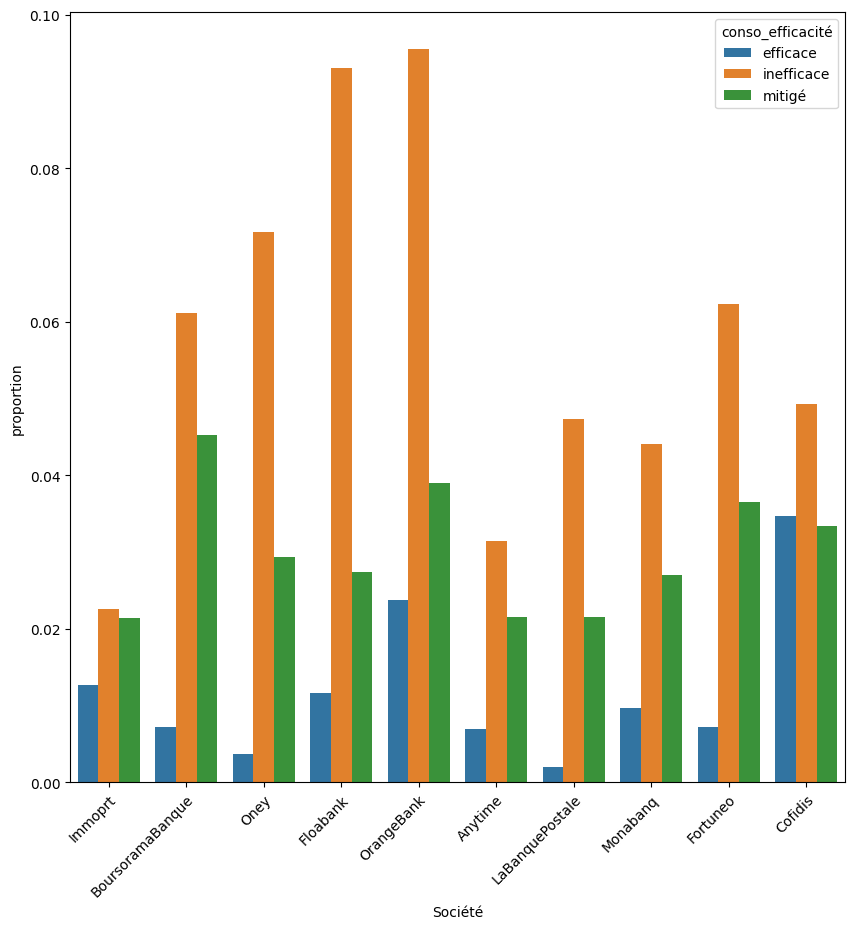

In [130]:
# top_bank topbank
list_top = [bank for bank in train.Société.value_counts().keys()[0:10]]
train_top = train[train['Société'].isin(list_top)]
train_top = train_top[train_top['conso_efficacité']!= "not discussed"]


import seaborn as sns
plt.figure(figsize=(10,10))
ax =sns.countplot(x = train_top.Société, hue = train_top["conso_efficacité"], stat= "proportion")
plt.xticks(rotation=45, ha = 'right', rotation_mode = "anchor");
plt.show()